# Optimizing the parameters of a ball-and-stick model

This notebook is under a LGPLv3 license.

In [5]:
import os
os.unsetenv('PYTHONHOME') # Solve an issue with NEURON simulator import

%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload

In [10]:
import bluepyopt
import bluepyopt.ephys as ephys

In [11]:
# Adding a Morphology
morph_swc_string = """
1 1 0.0 0.0 -10.0 10.0 -1                                                        
2 1 0.0 0.0 0.0 10.0 1                                                           
3 1 0.0 0.0 10.0 10.0 2                                                          
4 3 0.0 10.0 0.0 2.0 2                                                           
5 3 0.0 110.0 0.0 2.0 4
"""
with open('ballandstick.swc', 'w') as swc_file:
    swc_file.write(morph_swc_string)

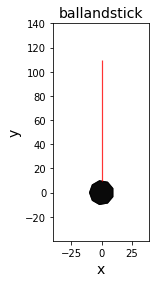

In [12]:
import neurom
import neurom.viewer
fig, ax = neurom.viewer.draw(neurom.load_neuron('ballandstick.swc'))

In [13]:
# Adding the morphology
morph = bluepyopt.ephys.morphologies.NrnFileMorphology('ballandstick.swc')

In [14]:
# Creating location objects
somatic_loc = ephys.locations.NrnSeclistLocation('somatic', seclist_name='somatic')
dend_loc = ephys.locations.NrnSeclistLocation('basal', seclist_name='basal')

In [15]:
# Creating an HH mechanism and adding it to locations
hh_mech = ephys.mechanisms.NrnMODMechanism(
        name='hh',
        suffix='hh',
        locations=[somatic_loc, dend_loc])

Let's define first a parameter that sets the specific capacitance of soma and dendrites to a frozen value. In this tutorial we'll focus on optimizing the parameters the soma. So we also fix the leakage conductance of the dendrite, and we make it passive by disabling the Na and K conductances.

In [16]:
# Creating parameters
cm = ephys.parameters.NrnSectionParameter(
        name='cm',
        param_name='cm',
        value=1.0, # in microfarad/cm2
        locations=[somatic_loc, dend_loc],
        frozen=True)


# Fix leak conductance dendrite
gl_dend = ephys.parameters.NrnSectionParameter(
        name='gl_dend',
        param_name='gl_hh',
        value=1e-5,
        locations=[dend_loc],
        frozen=True)

# Disable Na and K
gnabar_dend = ephys.parameters.NrnSectionParameter(                                    
        name='gnabar_hh_dend',
        param_name='gnabar_hh',
        locations=[dend_loc],
        value=0,
        frozen=True)   

gkbar_dend = ephys.parameters.NrnSectionParameter(
        name='gkbar_hh_dend',
        param_name='gkbar_hh',
        value=0,
        locations=[dend_loc],
        frozen=True)



In [17]:
# set the bounds for the maximal conductances of the sodium and potassium channels in the soma
gnabar_soma = ephys.parameters.NrnSectionParameter(                                    
        name='gnabar_soma',
        param_name='gnabar_hh',
        locations=[somatic_loc],
        bounds=[0.0, 1.0],
        frozen=False)     
gkbar_soma = ephys.parameters.NrnSectionParameter(
        name='gkbar_soma',
        param_name='gkbar_hh',
        bounds=[0.0, 1.0],
        locations=[somatic_loc],
        frozen=False)